# Exceptions to the Buy American Act

## Overview

The following dataset is a pre-collected Excel sheet from the Federal Business Opportunities website, which is a searchable collection of federal contract opportunities. It includes information on contract requirements and awards. There is an additional dataset of information collected for the exceptions to the Buy American Act (BAA), signed by President Hoover in 1933. This act required the United States government to prefer purchases from American companies.

## Features

Features of the dataset include information about the funding agency, country origin, dates signed and completed, North American Industry Classification System information, product information, vendor information, and contract value information. Of perhaps the most importance are the contract values. Total Contract Value is related to the proposal's value, in other words the value first indicated on the government's behalf. Action Obligation is the required payout over the life of the contract, or the value dictated by the market, government, and vendor together; this is the primary currency feature we will use.

Exceptions to the BAA can provide interesting insight for a few reasons. How much federal money is spent outside of the United States? Are there any trends to this, in terms of which countries or industries? What agencies frequently appear on this list?

A few basic summary statistics and visualizations will tell us a little bit about the contracts. After a quick look, we see it is necessary to drop entries with negative values for 'Action_Obligation' (we will use this as our primary value indicator) as it is unclear what a negative value indicates. We lose a little more than three thousand entries, but it should make the data dive more clear.

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

buy = pd.read_excel('../../_Datasets/Buy_American_Act.xls')
# buy2 = buy.copy()
buy.columns = ['Funding_Agency', 'Funding_Agency_ID',
       'Place_Manufacture_Desc',
       'Country_Origin_Code', 'PIID', 'Date_Signed',
       'Completion_Date', 'NAICS_Code', 'NAICS_Description',
       'Prod_Service_Code', 'Prod_Service_Desc',
       'Vendor_Name', 'Vendor_City', 'Vendor_State', 'Vendor_Country',
       'DUNS_No', 'Contract_Type', 'Award_IDV_Type',
       'Total_Contract_Val',
       'Action_Obligation']
print('The number of negative Action Obligation values to be dropped:\t', len(buy[buy['Action_Obligation'] < 0]))
buy = buy[buy['Action_Obligation'] >= 0]

The number of negative Action Obligation values to be dropped:	 3187


### Dataset - quick look

In [197]:
buy.head(3)

,Funding_Agency,Funding_Agency_ID,Place_Manufacture_Desc,Country_Origin_Code,PIID,Date_Signed,Completion_Date,NAICS_Code,NAICS_Description,Prod_Service_Code,Prod_Service_Desc,Vendor_Name,Vendor_City,Vendor_State,Vendor_Country,DUNS_No,Contract_Type,Award_IDV_Type,Total_Contract_Val,Action_Obligation
0,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2013-08-30,2014-08-31,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,0.00,6404.00
1,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2013-09-18,2013-09-30,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,2047.70,2047.70
2,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2015-05-20,2014-08-31,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,2587.52,2587.52


In [198]:
buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56348 entries, 0 to 59534
Data columns (total 20 columns):
Funding_Agency            56348 non-null object
Funding_Agency_ID         56348 non-null object
Place_Manufacture_Desc    56348 non-null object
Country_Origin_Code       56014 non-null object
PIID                      56348 non-null object
Date_Signed               56348 non-null datetime64[ns]
Completion_Date           56348 non-null datetime64[ns]
NAICS_Code                56317 non-null float64
NAICS_Description         56317 non-null object
Prod_Service_Code         56344 non-null object
Prod_Service_Desc         56344 non-null object
Vendor_Name               56340 non-null object
Vendor_City               56345 non-null object
Vendor_State              42719 non-null object
Vendor_Country            56286 non-null object
DUNS_No                   56348 non-null int64
Contract_Type             56280 non-null object
Award_IDV_Type            56348 non-null object
Total_Contr

#### Notes: info() and head()
Here we take a look at a table summary using info() and head() for a better idea of feature size and how many missing values exist.

Empty values and NaN do not seem to be a major issue when using the info() method. Vendor state has many missing values, but stateside contracts' purposes in a dataset about the exceptions are not clear, and it is not likely critical for our questions. We will skip describe() as the dataset is without several numeric values, and this method won't tell us much.

In [199]:
for col in buy.columns:
    print("{}\n".format(str(col)), len(buy[col].unique())) # There is probably a built-in for this

Funding_Agency
 202
Funding_Agency_ID
 200
Place_Manufacture_Desc
 5
Country_Origin_Code
 188
PIID
 46692
Date_Signed
 1653
Completion_Date
 3152
NAICS_Code
 706
NAICS_Description
 698
Prod_Service_Code
 555
Prod_Service_Desc
 561
Vendor_Name
 6968
Vendor_City
 2707
Vendor_State
 54
Vendor_Country
 105
DUNS_No
 6642
Contract_Type
 14
Award_IDV_Type
 4
Total_Contract_Val
 37963
Action_Obligation
 38037


#### Notes: Uniques
We also want to know how many unique values exist for each feature to get an idea of how much variation the dataset holds. The real variety of the data set is in its continuous variables, not its discrete ones - such as in the values associated with dollar amounts. *Exploring the relationships between these variables and Action_Obligation should prove interesting.*
## Exploratory Data Analysis: Basic
### Violin plot - contract values

C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


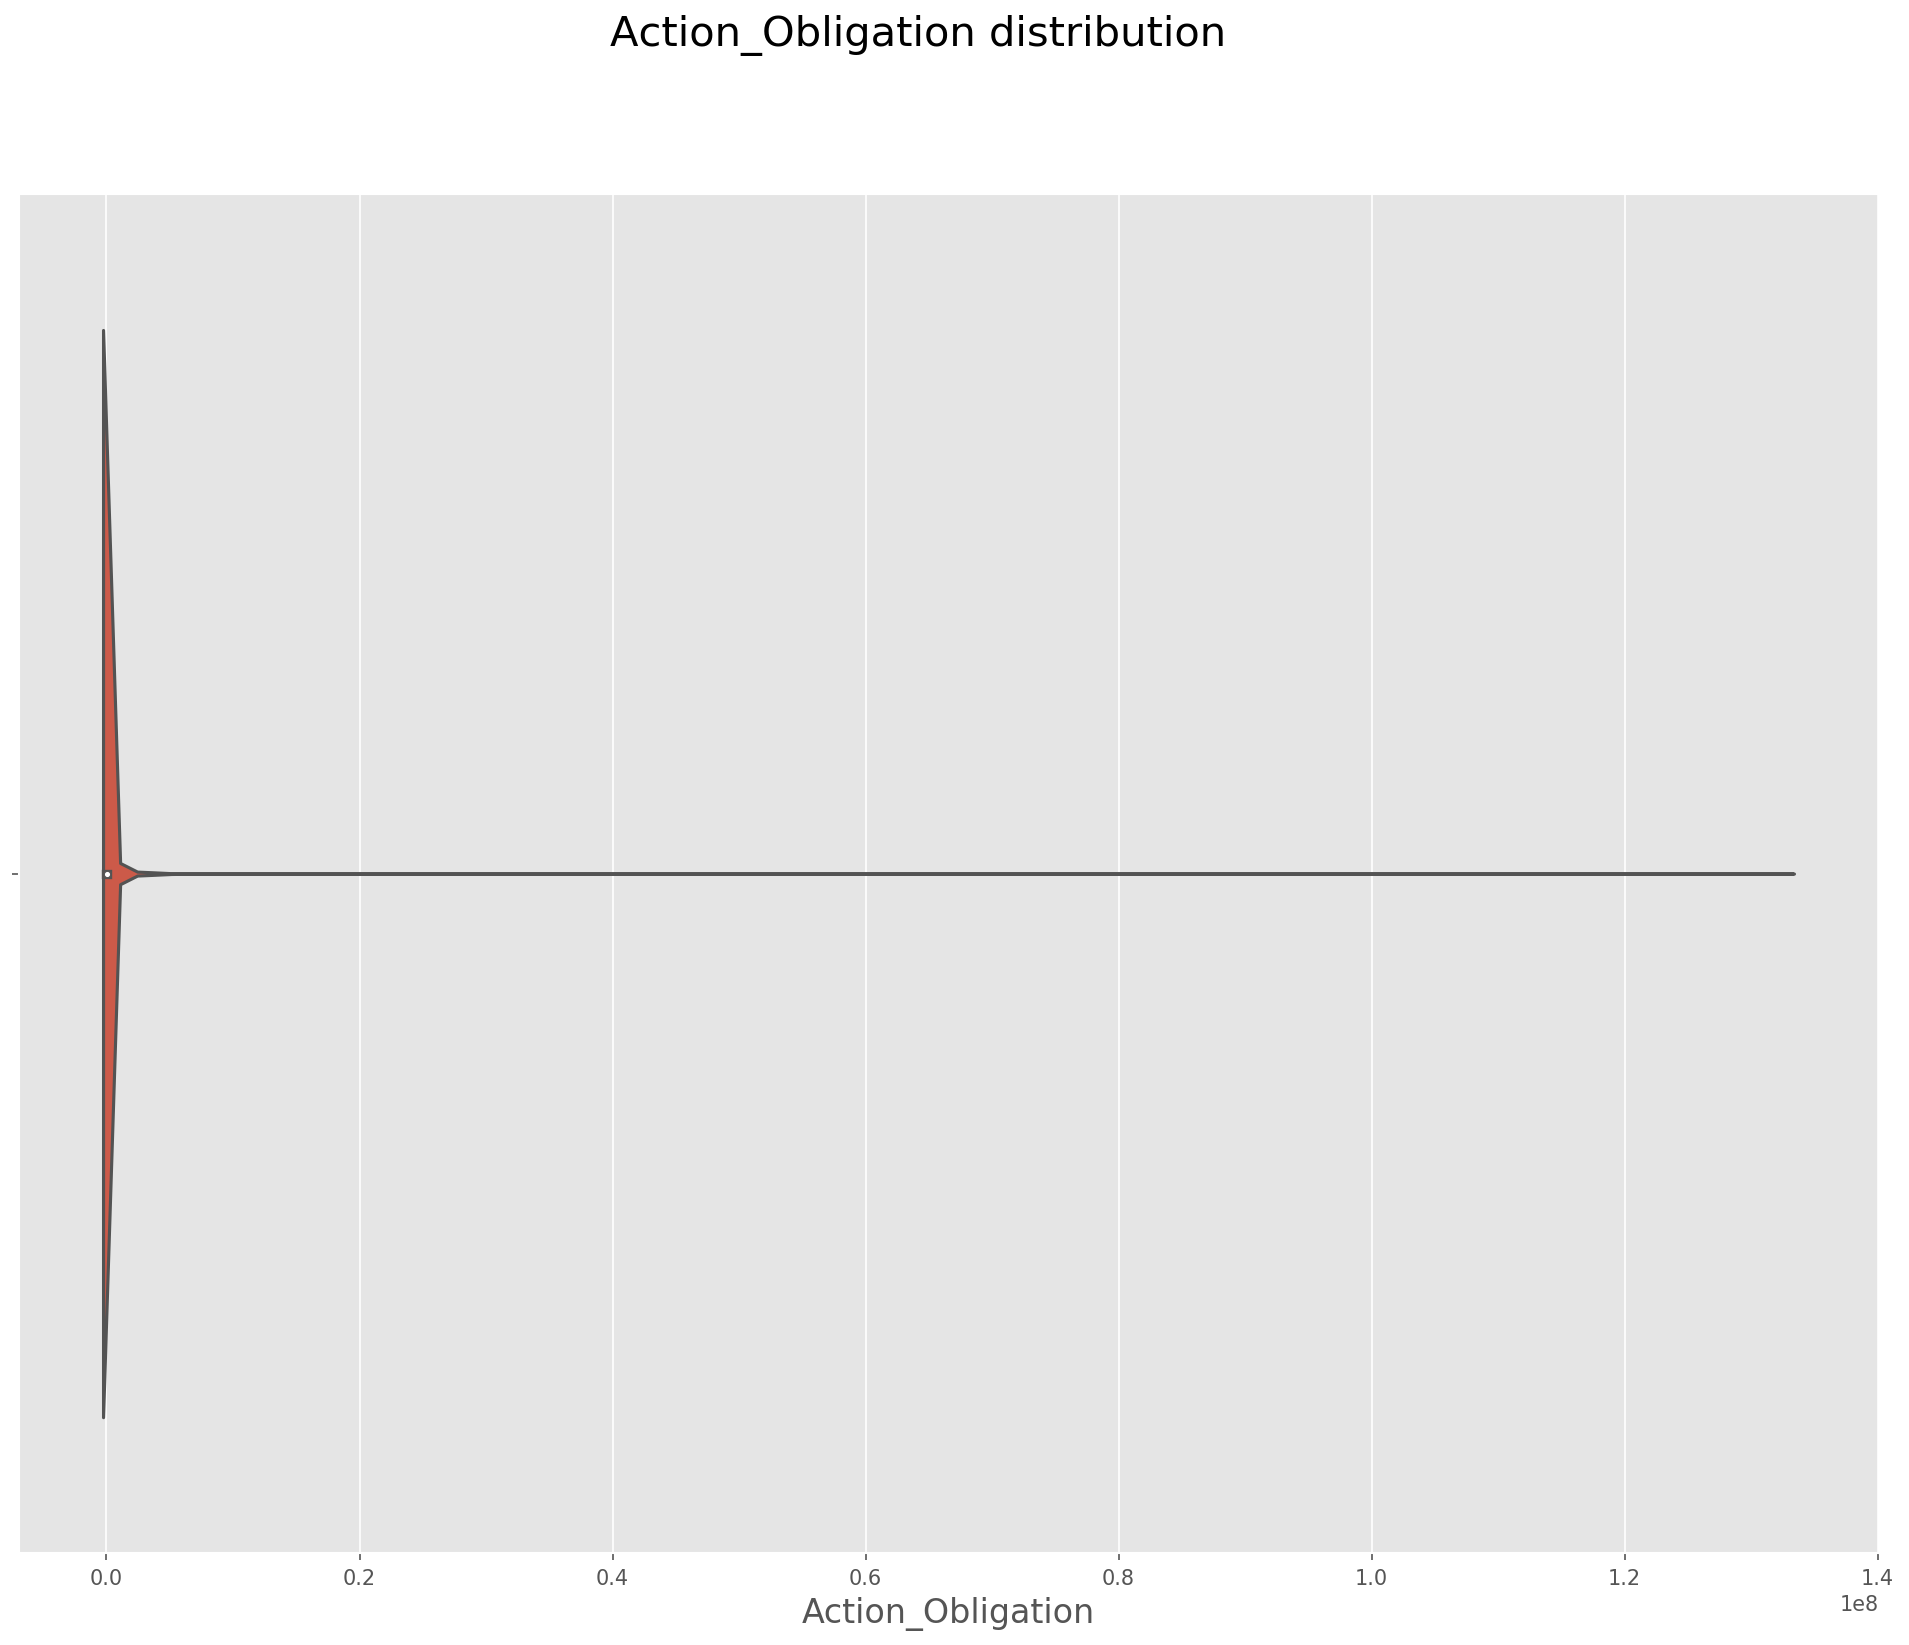

count    5.634800e+04
mean     6.968951e+04
std      1.205059e+06
min      0.000000e+00
25%      5.991900e+02
50%      5.621475e+03
75%      1.941032e+04
max      1.331093e+08
Name: Action_Obligation, dtype: float64


In [200]:
fig, ax = plt.subplots(1, 1, figsize=(16,12), dpi=150)
fig.suptitle('Action_Obligation distribution', size=20, ha='center')
ax = sns.violinplot(x=buy['Action_Obligation'], alpha=0.8)
plt.xlabel('Action_Obligation', size=16)
plt.show()
print(buy['Action_Obligation'].describe())

#### Notes: Violin plot
The violinplot above is not doing a good job of telling us much. The count around zero is overwhelmingly large. Very large outliers are likely skewing the information and spreading out the values too much for insight. The describe() method trick on this column above confirms this is the case. Distributions will be analyzed more later in the report.

### Bar plot - total annual contract values

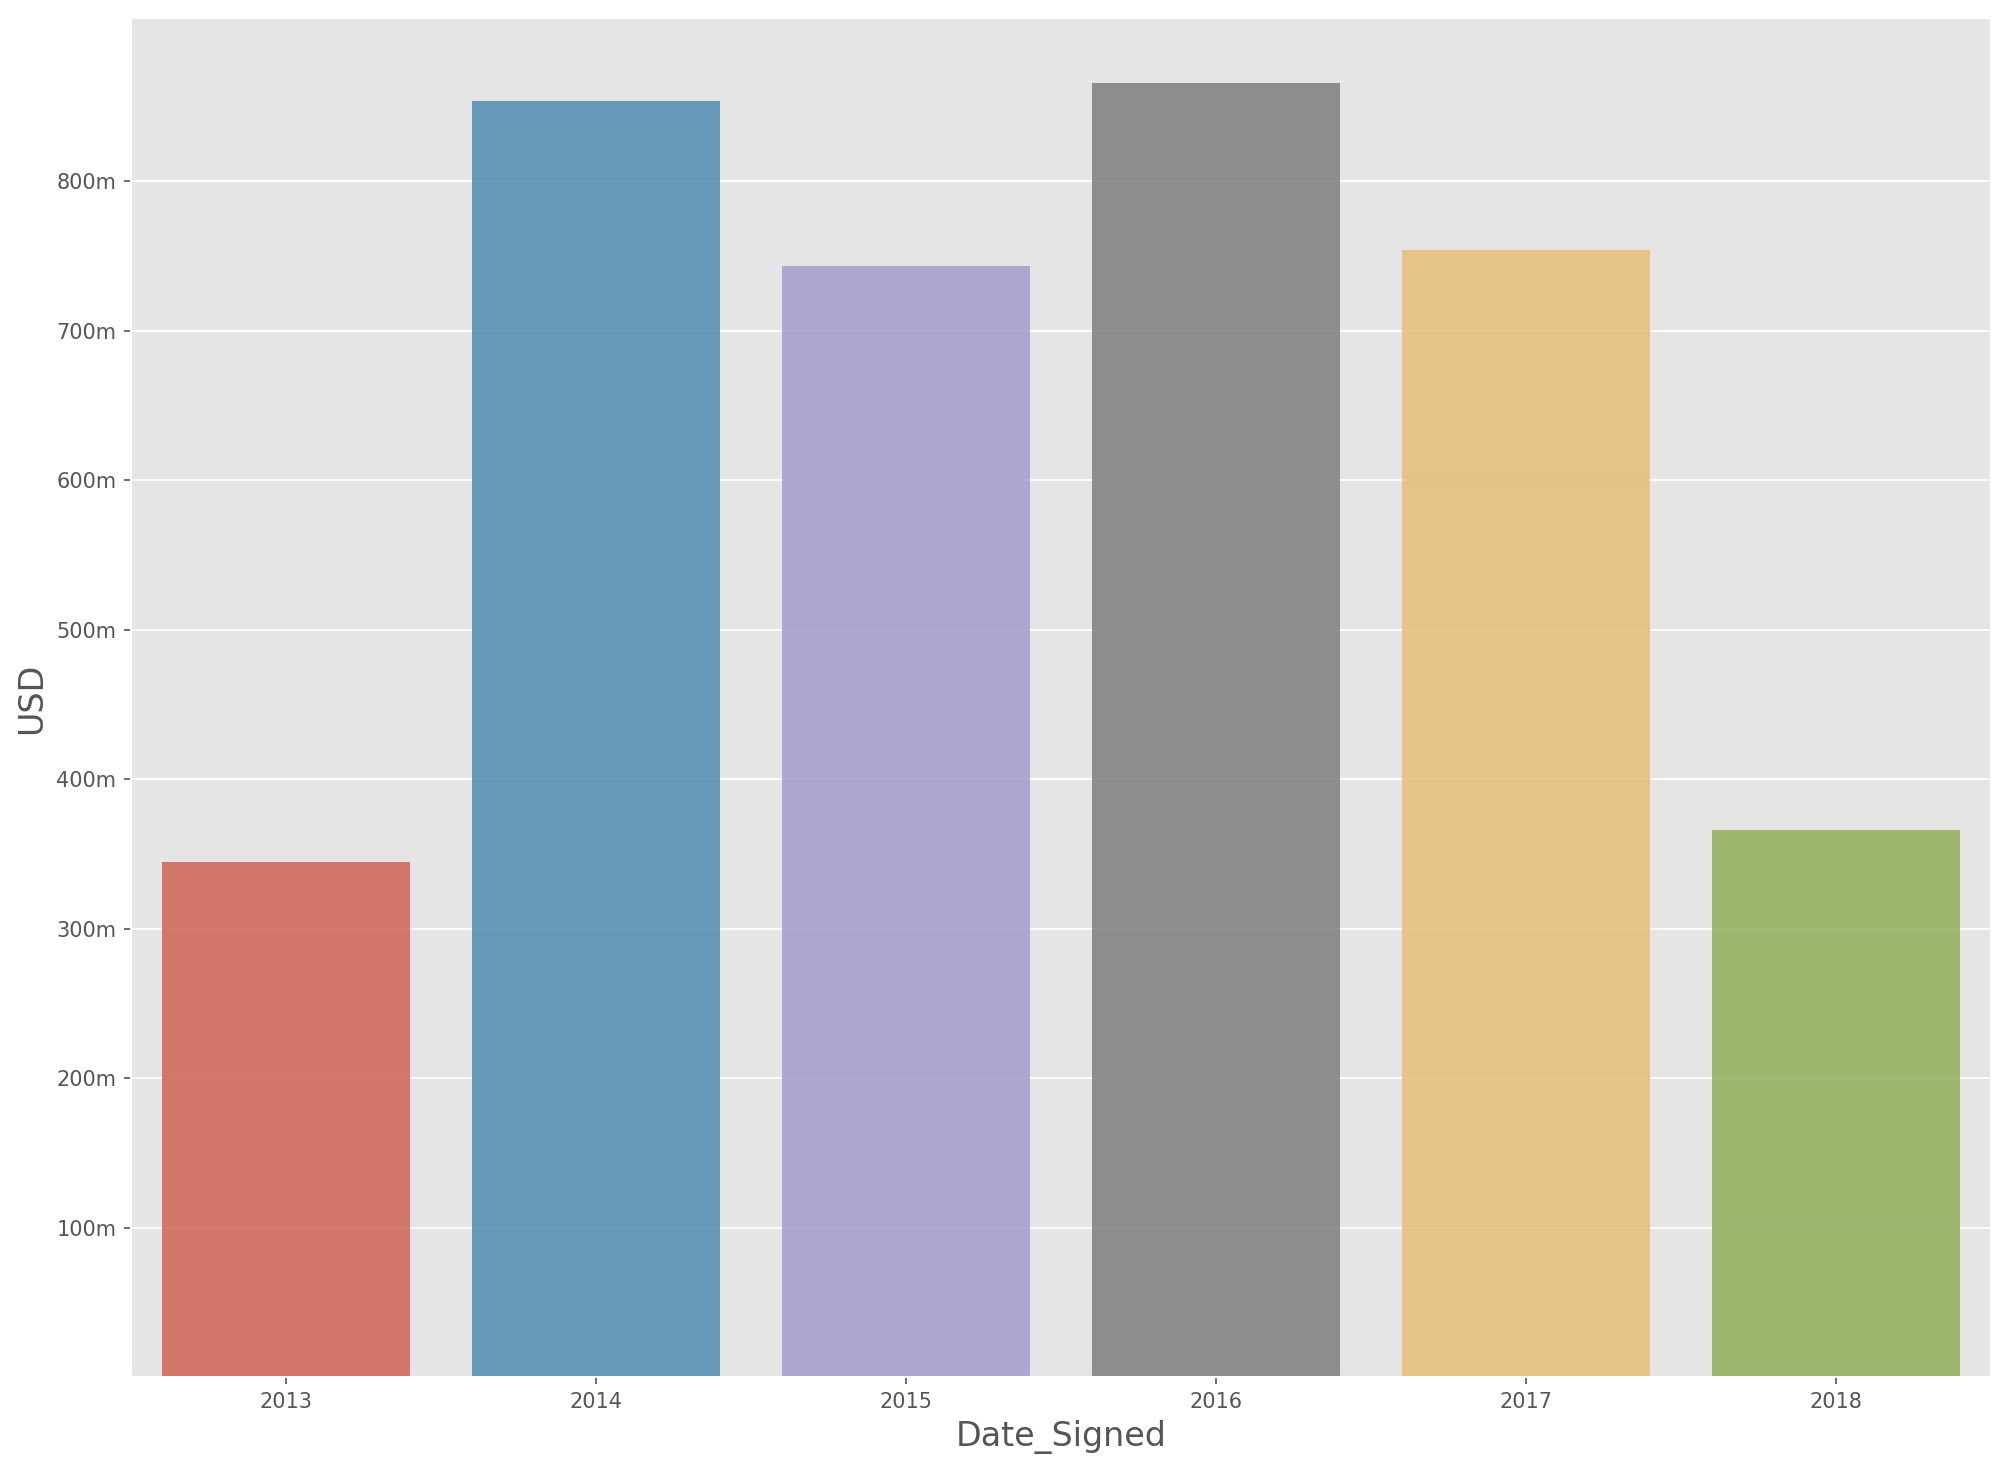

First contract date: 2013-08-01 00:00:00
Final contract date: 2018-07-31 00:00:00


In [201]:
date_val = pd.DataFrame(buy[['Action_Obligation', 'Date_Signed']])
date_val.index = date_val['Date_Signed']
del date_val['Date_Signed']
dateval_ser = date_val['Action_Obligation']

fig, ax = plt.subplots(1, 1, figsize=(16,12), dpi=150)
ax = sns.barplot(x=dateval_ser.resample('Y').sum().index, y=dateval_ser.resample('Y').sum().values, alpha=0.8)
plt.xlabel('Date_Signed', size=16)
plt.xticks(np.arange(6), [2013, 2014, 2015, 2016, 2017, 2018])
plt.ylabel('USD', size=16)
plt.yticks(np.arange(10**8, 9*10**8, 10**8), ['100m', '200m', '300m', '400m', '500m', '600m', '700m', '800m'])
plt.show()
print('First contract date: {}'.format(min(buy['Date_Signed'])))
print('Final contract date: {}'.format(max(buy['Date_Signed'])))

#### Notes: Bar plot
We can take the annual sum of total contract action obligations to see if there are major spending differences over time or obvious spikes. The first and last year of contracts are not for complete 12-month cycles, therefore we can expect their total spendings to be considerably less, as queried above.
## Deeper questions

As mentioned, the vast majority of this dataset revolves around categorical variables, such as agency, origin country, or product description *and their relationships to Action_Obligation*. These relationships will provide the most information about the exceptions to this federal spending law. 

This report will pose three general questions about the data and its trends. During the analysis of the features, these questions will be refined to try and discover more specific information. 

1. Are some foreign countries much more prevalent on this list? Is the reason obvious?
2. Do any federal agencies consistently appear on the list to award contracts overseas?
3. What can we learn about the industries and vendors awarded on this list? 

### Question one: Are some foreign countries much more prevalent on this list? Is the reason obvious?

C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


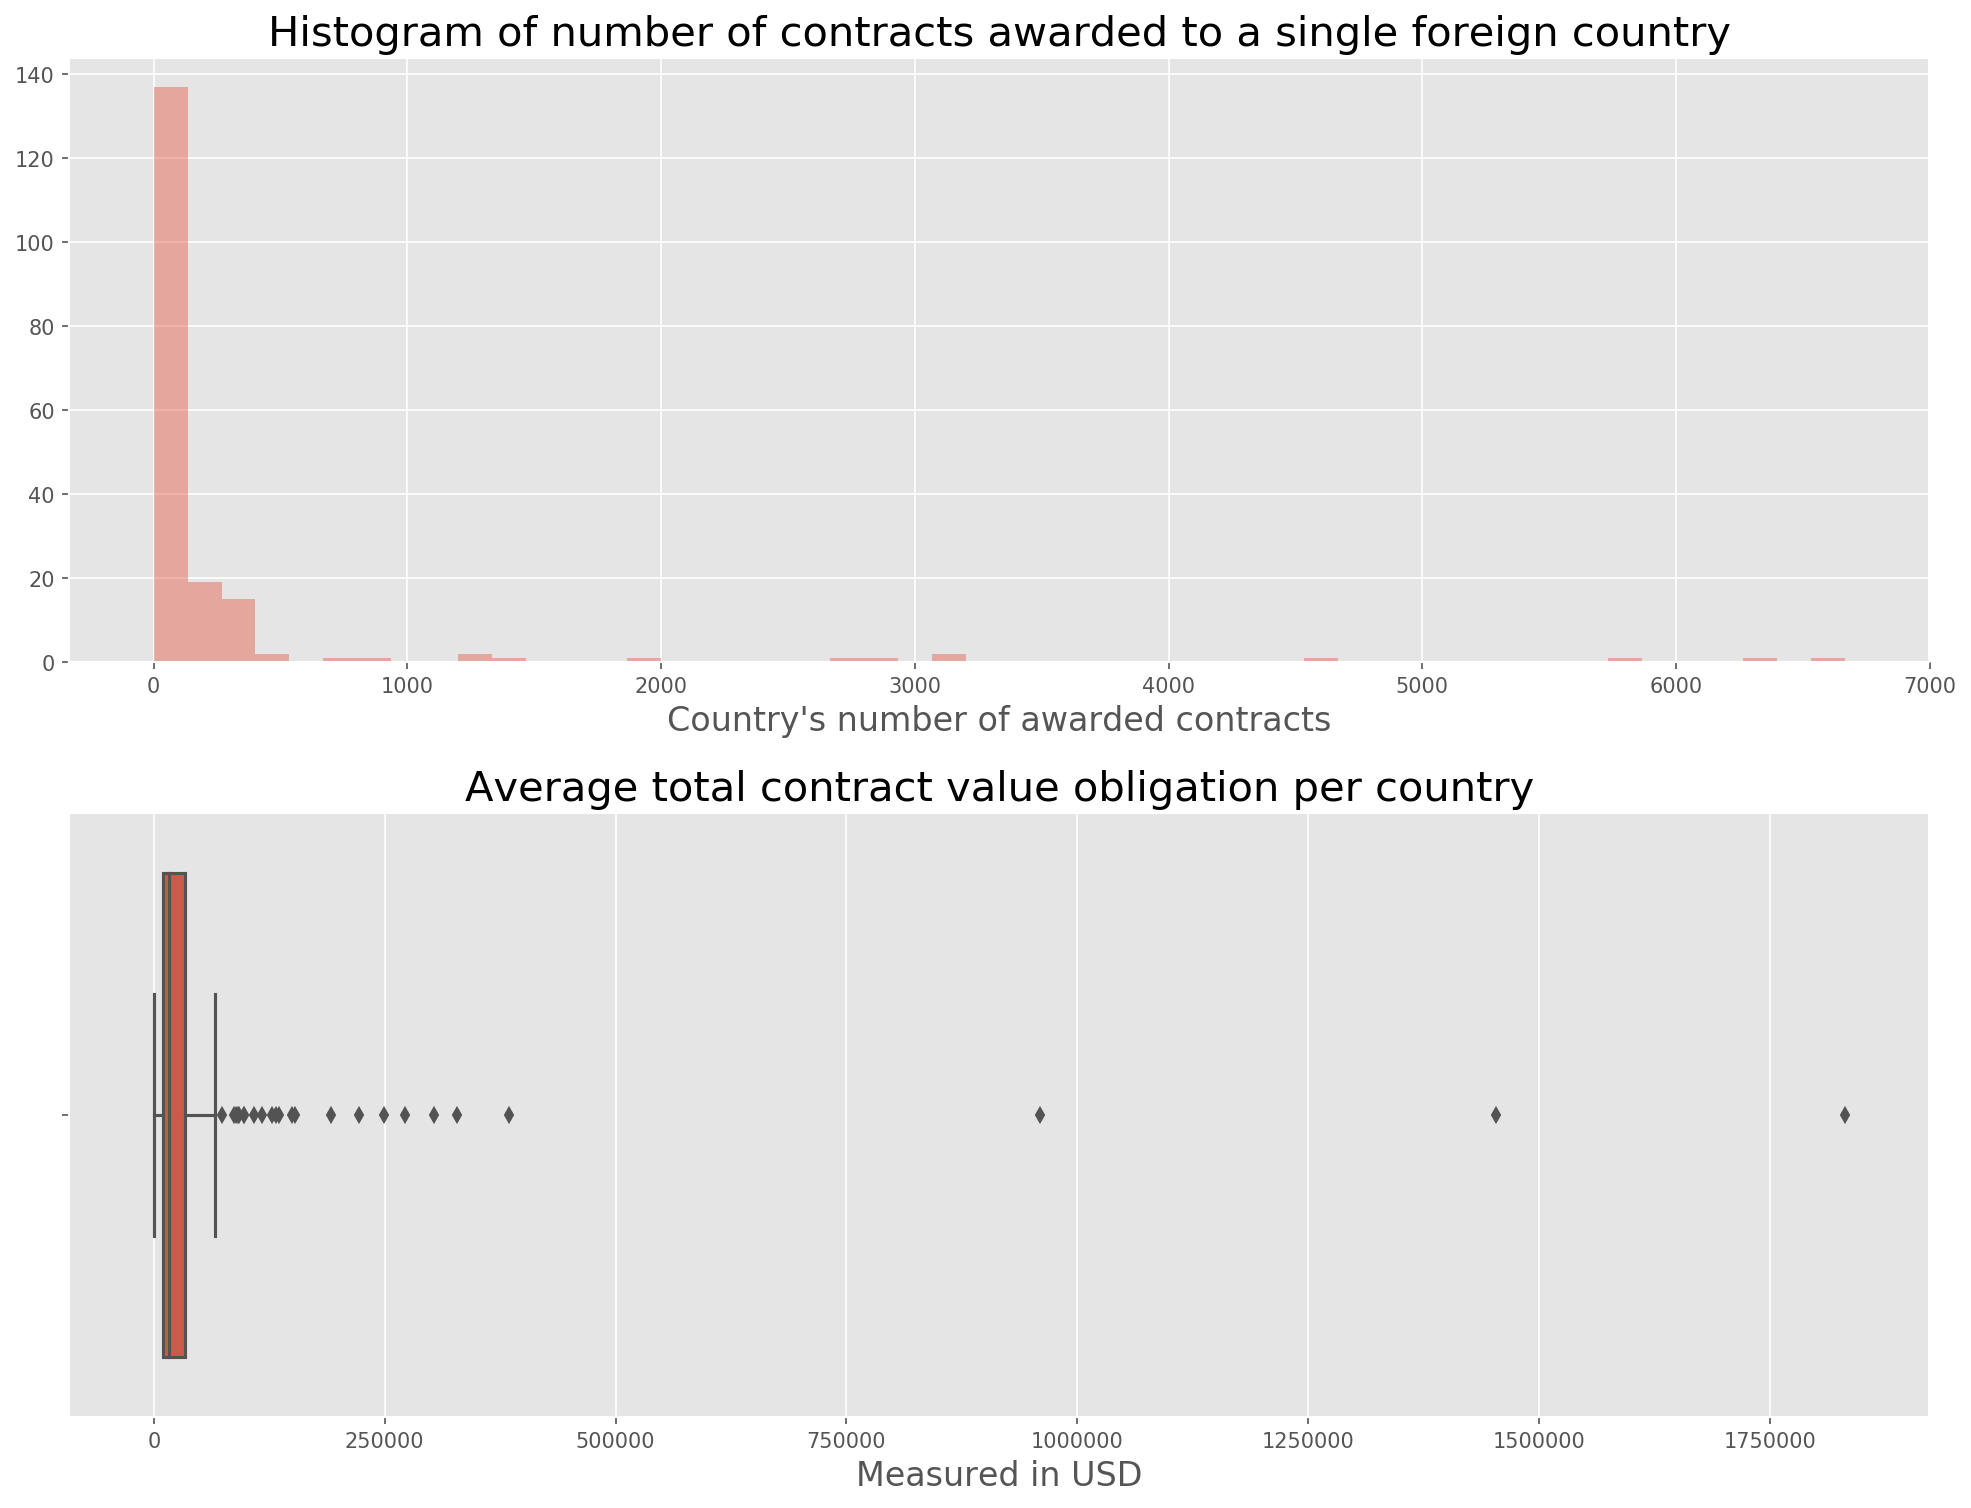

In [205]:
fig, ax = plt.subplots(2, 1, figsize=(16,12), dpi=150)
plt.subplot(211)
sns.distplot(buy['Country_Origin_Code'].value_counts(), kde=False)
plt.title('Histogram of number of contracts awarded to a single foreign country', size=20)
plt.xlabel("Country's number of awarded contracts", size=16)
plt.subplot(212)
sns.boxplot(buy.groupby('Country_Origin_Code')['Action_Obligation'].mean())
plt.title("Average total contract value obligation per country", size=20)
plt.xlabel('Measured in USD', size=16)
plt.subplots_adjust(hspace=0.25)
plt.show()

#### Notes: Visualizations
The first visualization is merely a histogram of the total number of contracts awarded to a foreign country. It appears that the vast majority of countries (around 135) receive 500 or fewer contracts.

The second visualization is a boxplot, or interquartile representation with outliers, of average contract values. 

Both of these visualizations hint to some payouts that are considerably higher. To know more about the right outliers, we can look at the next graph and summary statistic.

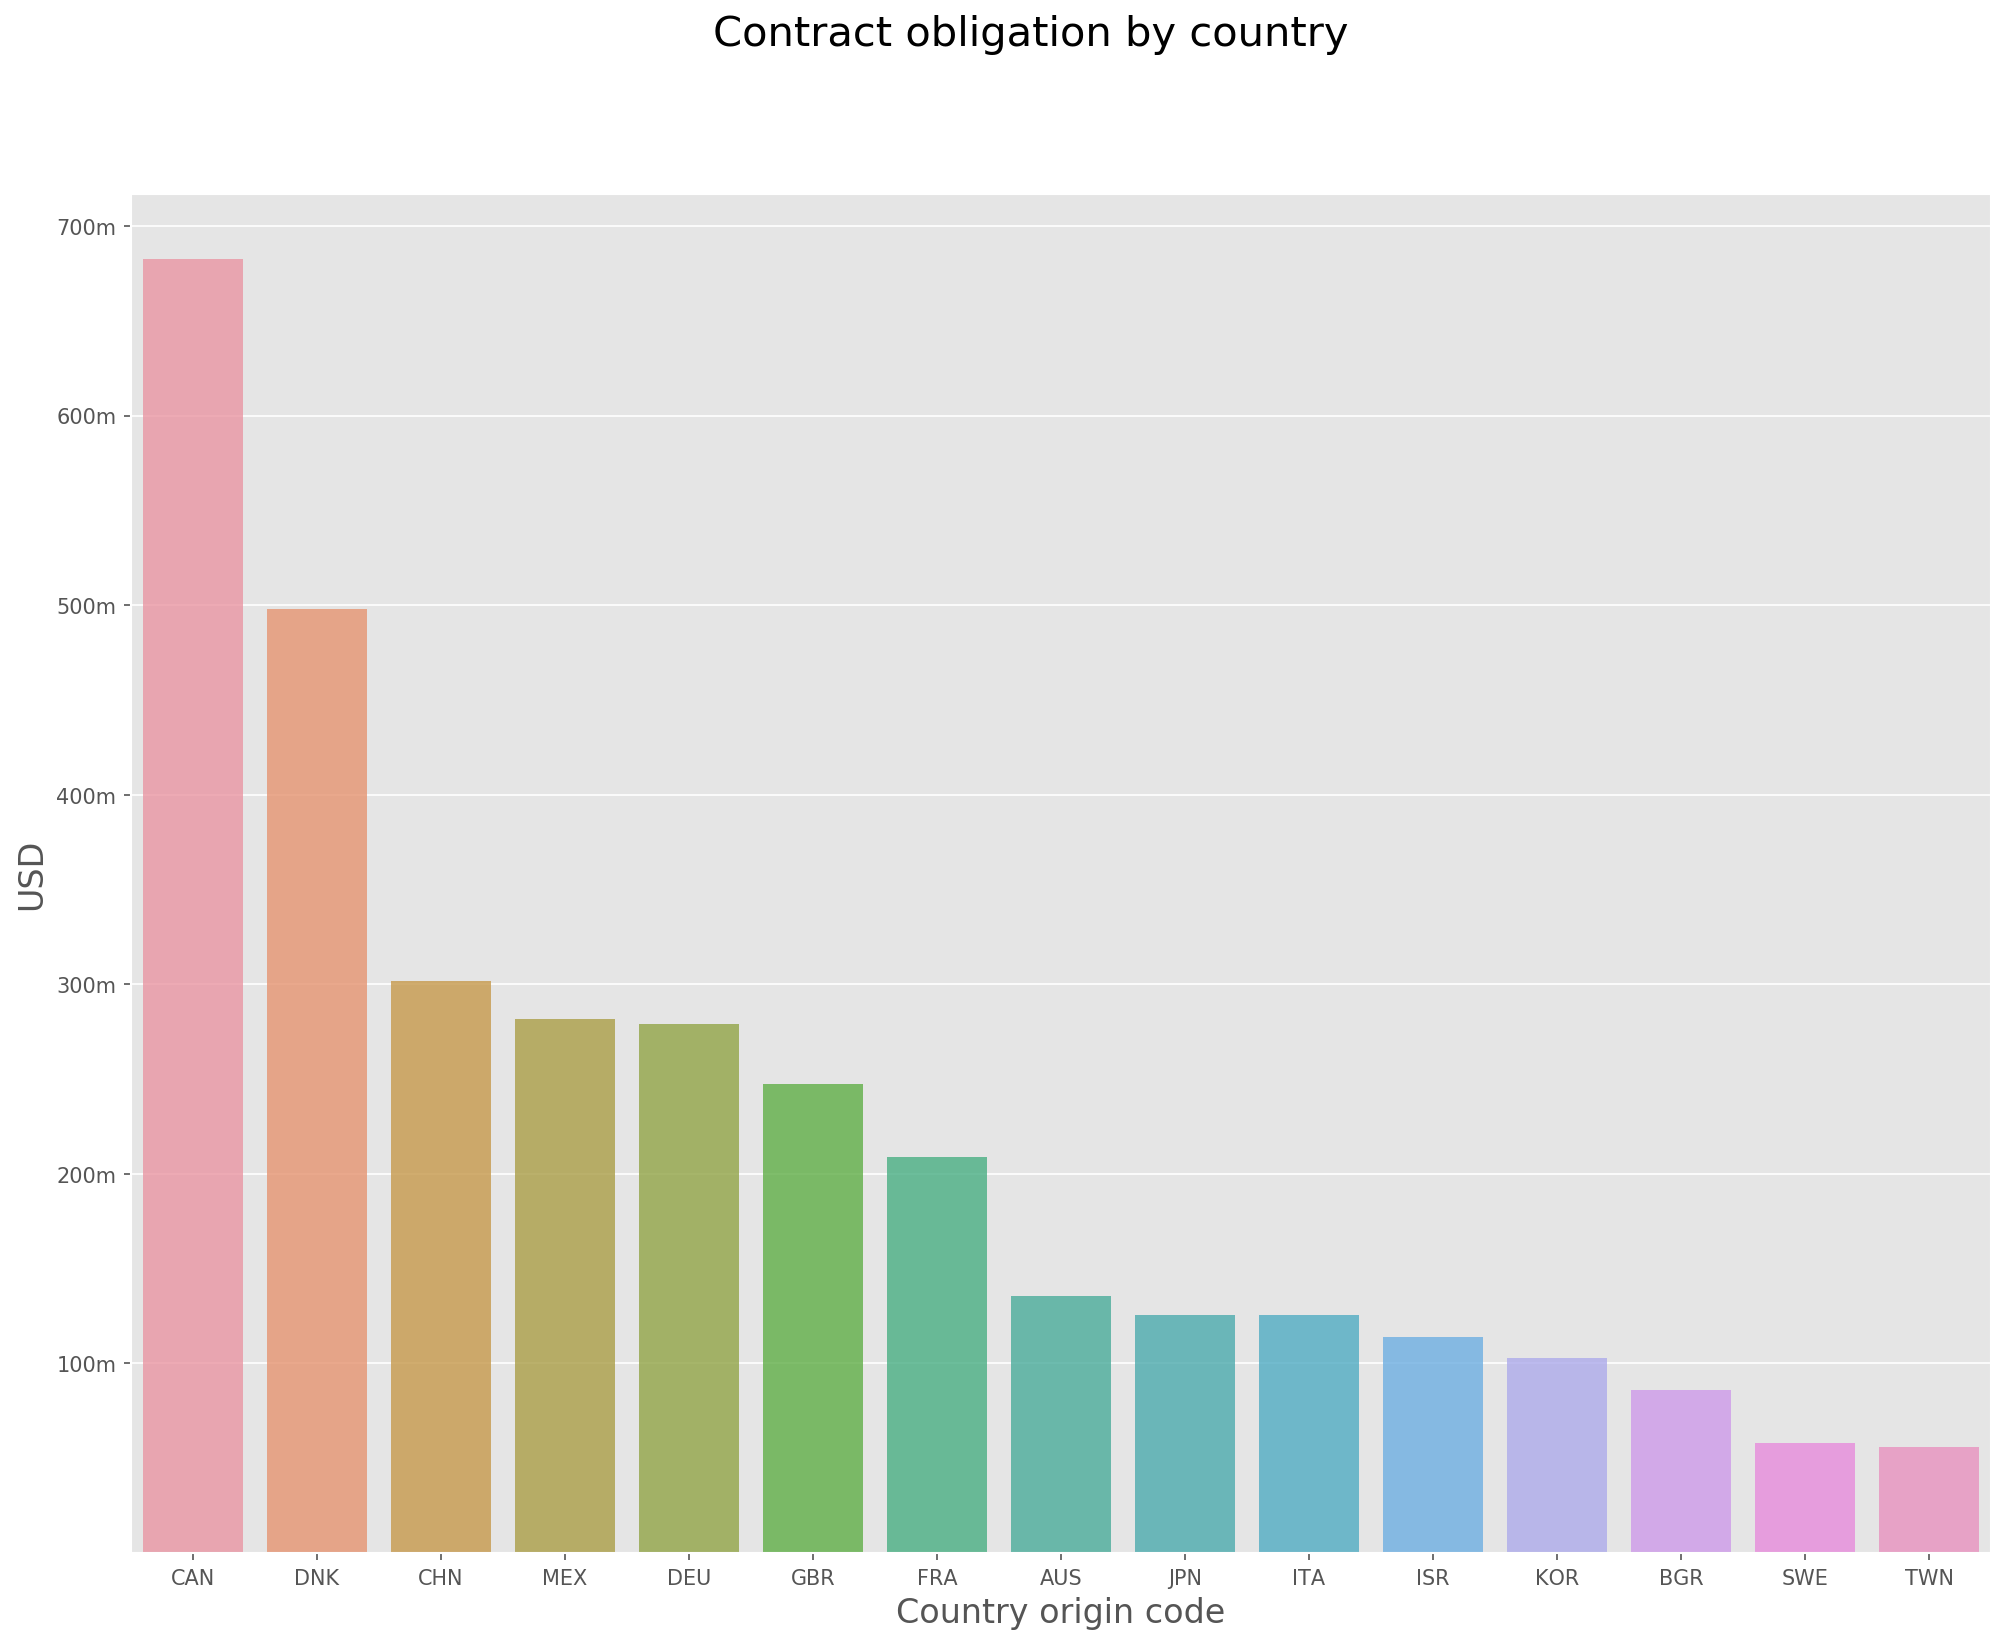

Number of contracts awarded - Absolute Count List

 CHN    6665
MEX    6273
CAN    5808
FRA    4592
JPN    3162
DEU    3135
KOR    2872
GBR    2719
TWN    1924
ZAF    1387
IND    1310
CHE    1289
ITA     838
SGP     740
MYS     519
Name: Country_Origin_Code, dtype: int64


In [206]:
fig, ax = plt.subplots(1, 1, figsize=(16,12), dpi=150)
fig.suptitle('Contract obligation by country', size=20, ha='center')
sums = buy.groupby('Country_Origin_Code')['Action_Obligation'].agg(np.sum).sort_values(ascending=False)[:15]
ax = sns.barplot(x=sums.index, y=sums.values, alpha=0.8)
plt.yticks(np.arange(10**8, 8*10**8, 10**8), ['100m', '200m', '300m', '400m', '500m', '600m', '700m'])
plt.ylabel('USD', size=16)
plt.xlabel('Country origin code', size=16)
plt.show()
print('Number of contracts awarded - Absolute Count List\n\n', buy['Country_Origin_Code'].value_counts()[:15])

#### Notes: Country barplot - identifying the outliers
With this barplot, we can see how much total federal money for contracts was awarded to the entire foreign country. The highest 15 provide some insight when we set them beside the nations on the other list of the top 15 awarded countries, *simply by number of contracts*, listed below the barplot. 

For example, South Africa, Switzerland, and India are on the list of *high* Total Contract Values without making the contract absolute count list. Denmark, Israel, and Australia make the list of *absolute counts* while not appearing on the total contract value list. This suggests some countries have a higher average contract value as they have high total contract obligation values but low contract count - this was indicated earlier as right outliers on the boxplot and histogram.

It isn't too surprising that countries like Canada, China, Mexico, Germany, France, and other economic powerhouses make the total contract obligation list (some even make both). However, seeing Denmark with the second-highest total award value is surprising! 
### Question two: What can we learn about the industries and companies awarded on this list?
Table of summations:

In [10]:
contractsum_country = pd.DataFrame(buy.pivot_table(
    index=['Prod_Service_Desc', 'Country_Origin_Code'], aggfunc=sum)['Total_Contract_Val']).unstack()
contractsum_country.head(3)

Total_Contract_Val          \
Country_Origin_Code                                             ABW AFG AGO   
Prod_Service_Desc                                                             
ABRASIVE MATERIALS                                              NaN NaN NaN   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY                NaN NaN NaN   
ACCOUNTING AND CALCULATING MACHINES                             NaN NaN NaN   

                                                                            \
Country_Origin_Code                              AIA ALB       ARE ARG ARM   
Prod_Service_Desc                                                            
ABRASIVE MATERIALS                               NaN NaN       NaN NaN NaN   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY NaN NaN  13663.37 NaN NaN   
ACCOUNTING AND CALCULATING MACHINES              NaN NaN       NaN NaN NaN   

                                                                   ...      \
Country_Origin_Code                                  ASM       AUS ... VEN   
Prod_Service_Desc                                                  ...       
ABRASIVE MATERIALS                                   NaN  611763.0 ... NaN   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY     NaN       NaN ... NaN   
ACCOUNTING AND CALCULATING MACHINES               9195.0       NaN ... NaN   

                                                                              \
Country_Origin_Code                              VGB VNM WSM XKS XQZ YEM ZAF   
Prod_Service_Desc                                                              
ABRASIVE MATERIALS                               NaN NaN NaN NaN NaN NaN NaN   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY NaN NaN NaN NaN NaN NaN NaN   
ACCOUNTING AND CALCULATING MACHINES              NaN NaN NaN NaN NaN NaN NaN   

                                                          
Country_Origin_Code                              ZMB ZWE  
Prod_Service_Desc                                         
ABRASIVE MATERIALS                               NaN NaN  
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY NaN NaN  
ACCOUNTING AND CALCULATING MACHINES              NaN NaN  

[3 rows x 187 columns]

#### Notes: Summary table
Above, we see a preliminary step summing country Action_Obligations grouped by Prod_Serv_Desc. (Product or Service Description)

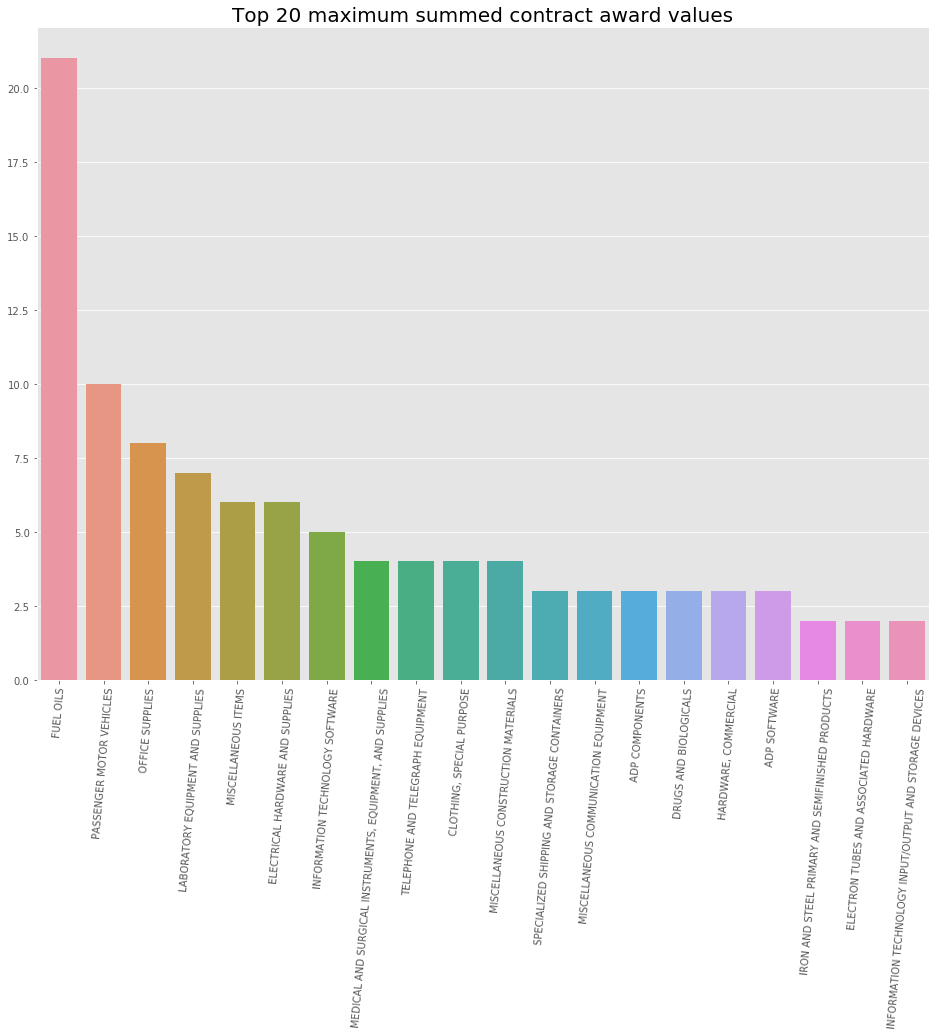

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(16,12))
ax = sns.barplot(x=contractsum_country.idxmax().value_counts()[:20].index, 
                 y=contractsum_country.idxmax().value_counts()[:20].values)
plt.xticks(rotation=85)
plt.title('Top 20 maximum summed contract award values', size=20)
plt.show()

#### Notes: Barplot - strongest summed industries by country
This visualization is the count of the highest-awarded industry in each country, tallied. 'Fuel oils' takes a clear lead, with more than 20 countries receiving the most total contract money in this industry; it is not bizarre to see fuels and oils taking top dollar. 'Passenger motor vehicles' takes second at 10, and 'Office supplies' is in third. Many of the others on this list sit between two and five.

### Summed industries by country - overall
In the below table and following visualization, we flip the primary variable in the multi-index, and group first by country, then by Prod_Serv_Desc. It tells us more about the grouping of total contract values in each country, split by industry.

In [81]:
country_prodserv = buy.groupby(['Country_Origin_Code', 'Prod_Service_Desc']).sum()['Action_Obligation']
print(country_prodserv.head(5), '\n')
print((country_prodserv / country_prodserv.sum(level='Country_Origin_Code')).head(), '\n')

Country_Origin_Code  Prod_Service_Desc                                  
ABW                  ADP SUPPLIES                                           17178.00
                     MISCELLANEOUS POWER TRANSMISSION EQUIPMENT              4344.00
                     PETROLEUM PRODUCTION AND DISTRIBUTION EQUIPMENT          700.82
                     PIPE, TUBE AND RIGID TUBING                               55.50
AFG                  ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), ANALOG     7386.00
Name: Action_Obligation, dtype: float64 

Country_Origin_Code  Prod_Service_Desc                                  
ABW                  ADP SUPPLIES                                           0.771064
                     MISCELLANEOUS POWER TRANSMISSION EQUIPMENT             0.194988
                     PETROLEUM PRODUCTION AND DISTRIBUTION EQUIPMENT        0.031457
                     PIPE, TUBE AND RIGID TUBING                            0.002491
AFG                  ADP CENTRAL PROCESSING UNI

#### Notes: Summary statistics
The first table head() shows summary statistics of industries by country. It is not overly useful because it removes the context and relevance of the values. The second transforms each industry sum value into its percentage of the country's total contract sums. We can consider this industry contract percentage to find possible trends.

In [83]:
cps_perc = country_prodserv / country_prodserv.sum(level='Country_Origin_Code')
print(cps_perc[cps_perc.isna()], '\n')
print(cps_perc['COM'], '\n')
print(buy[buy['Country_Origin_Code'] == 'COM']['Action_Obligation'], '\n') # 0 / sum([0, 0]) is indeterminant
cps_perc['COM'] = 0
print(cps_perc['COM'])

Country_Origin_Code  Prod_Service_Desc              
COM                  FIBER OPTIC SENSORS               NaN
                     INFORMATION TECHNOLOGY SOFTWARE   NaN
Name: Action_Obligation, dtype: float64 

Prod_Service_Desc
FIBER OPTIC SENSORS               NaN
INFORMATION TECHNOLOGY SOFTWARE   NaN
Name: Action_Obligation, dtype: float64 

34112    0.0
34330    0.0
Name: Action_Obligation, dtype: float64 

Prod_Service_Desc
FIBER OPTIC SENSORS                0.0
INFORMATION TECHNOLOGY SOFTWARE    0.0
Name: Action_Obligation, dtype: float64


#### Notes: Indeterminant 
The country of Colombia had two exceptions on the list; both ultimately settled at prices of 0. Each summed by the industry totals resulted in indeterminant values, so we replaced them with zeroes instead of NaN.

C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


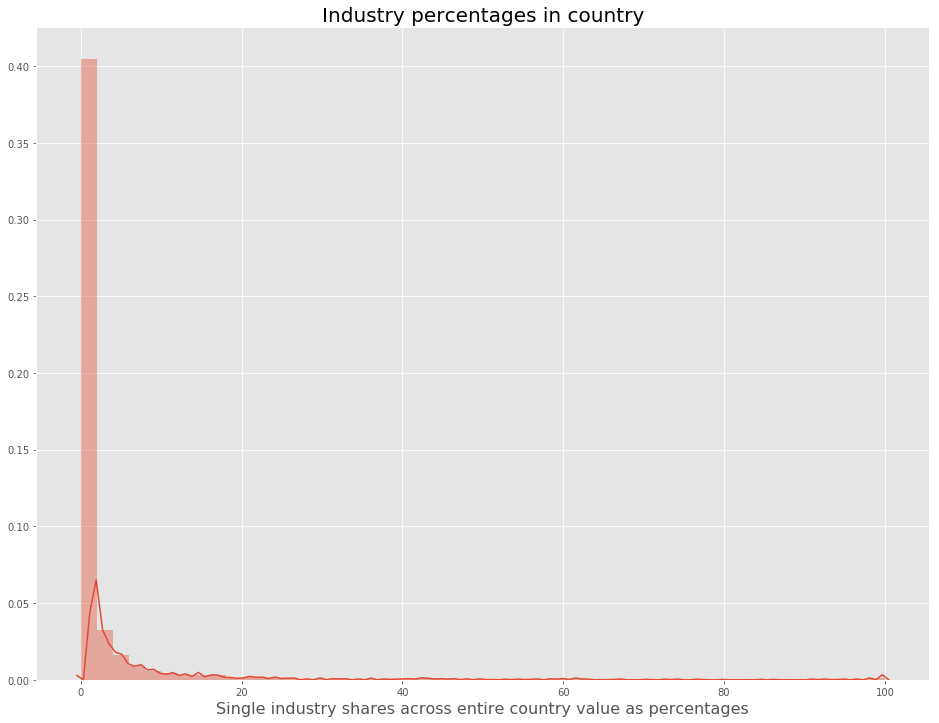

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(16,12))
ax = sns.distplot(cps_perc * 100)
plt.title('Industry percentages in country', size=20)
plt.xlabel('Single industry shares across entire country value as percentages', size=16)
plt.show()

#### Notes: Industry percentages by country
It is reassuring to see that industries largely hold small percentages of the total contract values by country - this suggests their economies are fairly well diversified and do not rely on a single cash cow (per the set dataset's industry identification scheme).

Of course, some industries take on higher shares of the economy - in some cases we are seeing them reach the 100 percent mark.

### Question three: Do any federal agencies consistently appear on the list to award contracts overseas? 
Determine which feature to use for agency identification:

In [83]:
print(buy[['Funding_Agency', 'Funding_Agency_ID']].loc[59517:59518], '\n')
print(len(buy.groupby(['Funding_Agency', 'DUNS_No']).sum()))
print(len(buy.groupby(['Funding_Agency', 'Vendor_Name']).sum()))

grouped = buy.groupby(['Funding_Agency', 'DUNS_No']).sum()
grouped.head()

               Funding_Agency Funding_Agency_ID
59517   WAGE AN HOUR DIVISION              1636
59518  WAGE AND HOUR DIVISION              1636 

10920
11309


NAICS_Code  \
Funding_Agency                            DUNS_No                 
ADVISORY COUNCIL ON HISTORIC PRESERVATION 1818012      999945.0   
AFRICAN DEVELOPMENT FOUNDATION            565409018    846220.0   
AGENCY FOR INTERNATIONAL DEVELOPMENT      5987268      668440.0   
                                          20149303     763360.0   
                                          40928496     522293.0   

                                                     Total_Contract_Val  \
Funding_Agency                            DUNS_No                         
ADVISORY COUNCIL ON HISTORIC PRESERVATION 1818012               4635.22   
AFRICAN DEVELOPMENT FOUNDATION            565409018            35324.99   
AGENCY FOR INTERNATIONAL DEVELOPMENT      5987268             186655.50   
                                          20149303            112308.60   
                                          40928496                 0.00   

                                                     Action_Obligation  
Funding_Agency                            DUNS_No                       
ADVISORY COUNCIL ON HISTORIC PRESERVATION 1818012             11039.22  
AFRICAN DEVELOPMENT FOUNDATION            565409018           35324.99  
AGENCY FOR INTERNATIONAL DEVELOPMENT      5987268            186655.50  
                                          20149303           112308.60  
                                          40928496                0.00

#### Notes: DUNS_No and Vendor_Name
With the difference in number of Funding_Agency values grouped by Vendor_Name and DUNS_No (DUNS_No represents the vendor ID per the program), we can stick with the DUNS_No as the grouping feature. Some data poking shows that some vendor names are very similar and intended to match but differ due to human error.

Data aggregation of grouped has created some NaN - only 20 - so we will drop those values, done below.

In [138]:
grouped2 = buy.groupby(['Funding_Agency', 'DUNS_No']).agg(np.mean)
print(grouped2.info())
grouped2.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10920 entries, (ADVISORY COUNCIL ON HISTORIC PRESERVATION, 1818012) to (WASHINGTON HEADQUARTERS SERVICES (WHS), 220103332)
Data columns (total 3 columns):
NAICS_Code            10900 non-null float64
Total_Contract_Val    10920 non-null float64
Action_Obligation     10920 non-null float64
dtypes: float64(3)
memory usage: 352.2+ KB
None


C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


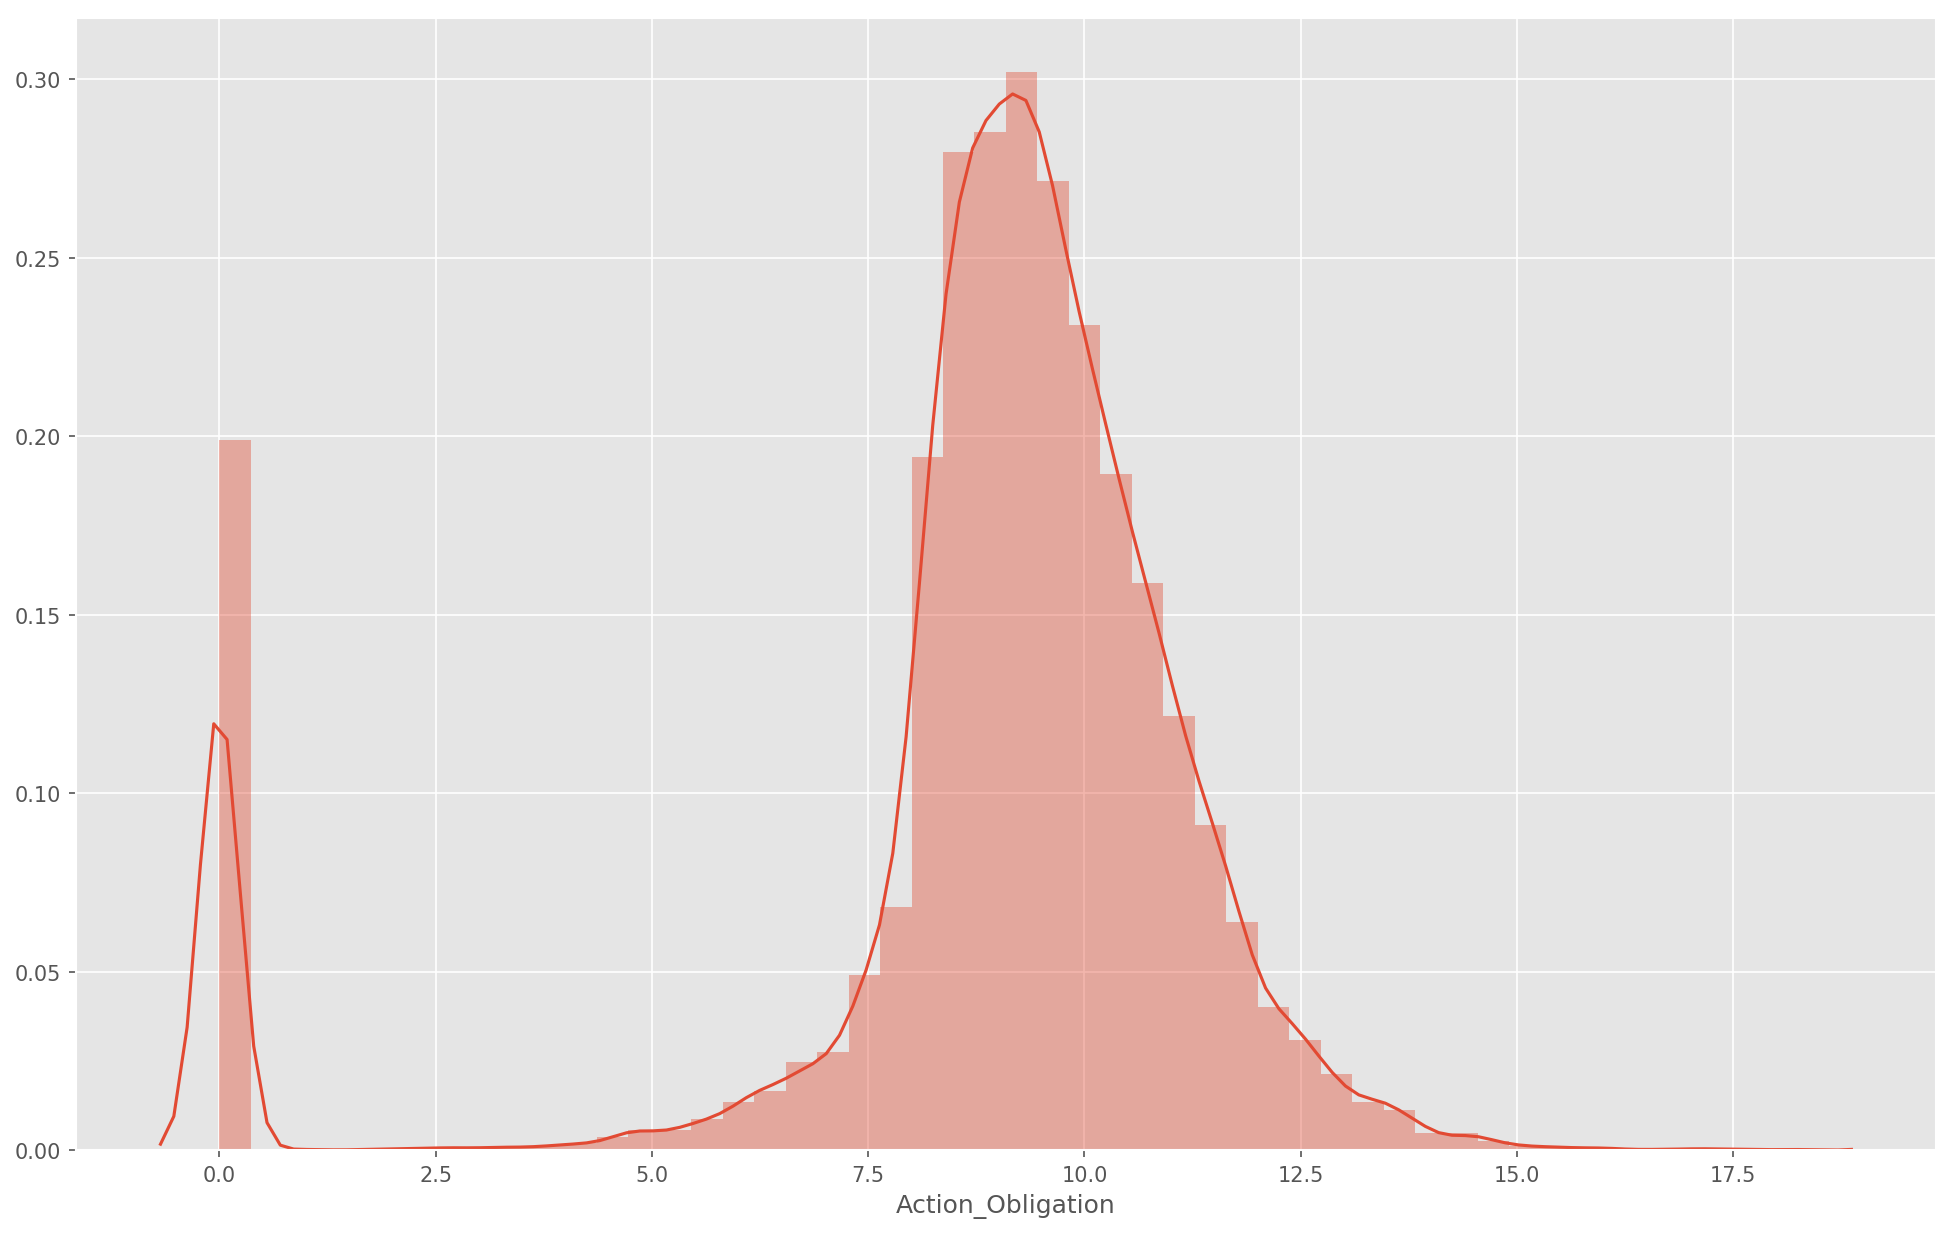

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(16,10), dpi=150)
ax = sns.distplot(np.log(grouped2['Action_Obligation'] + 1))
plt.show()

#### Notes: Histogram with KDE
This histogram represents the values of companies total action obligation within federal agencies - on a logarithmic scale. It sheds light on how much agencies are paying out to single companies in total over the period of the data collected. The value e to the power of 8 or so where the peak lies is roughly $3,000. It does not seem that foreign companies are receiving a ton of favoritism in this regard, as the high-dollar values begin to thin out drastically.

#### Agencies with most total action obligation variation
Lastly, we will consider three of the top four agencies that have the highest amount of variation of the period.

In [210]:
buy['Year_Signed'] = buy.Date_Signed.dt.year
year_min = buy.groupby(['Funding_Agency_ID', 'Funding_Agency', 'Year_Signed'])['Action_Obligation'].sum().min(level='Funding_Agency_ID')
year_max = buy.groupby(['Funding_Agency_ID', 'Funding_Agency', 'Year_Signed'])['Action_Obligation'].sum().max(level='Funding_Agency_ID')
high_changes = buy[buy.Funding_Agency_ID.isin((year_max - year_min).sort_values(ascending=False)[:4].index)]
high_changes.groupby(['Funding_Agency', 'Year_Signed'])['Action_Obligation'].sum()[:18]

Funding_Agency               Year_Signed
DEPT OF THE ARMY             2013           6.177804e+07
                             2014           1.168721e+08
                             2015           1.111742e+08
                             2016           1.803522e+08
                             2017           3.927808e+07
                             2018           3.780288e+06
DEPT OF THE NAVY             2013           7.222951e+07
                             2014           2.093049e+08
                             2015           1.692431e+08
                             2016           1.838217e+08
                             2017           1.156246e+08
                             2018           2.813891e+07
FEDERAL ACQUISITION SERVICE  2013           5.141162e+05
                             2014           2.727778e+05
                             2015           2.453290e+04
                             2016           2.151300e+04
                             2017           5.2

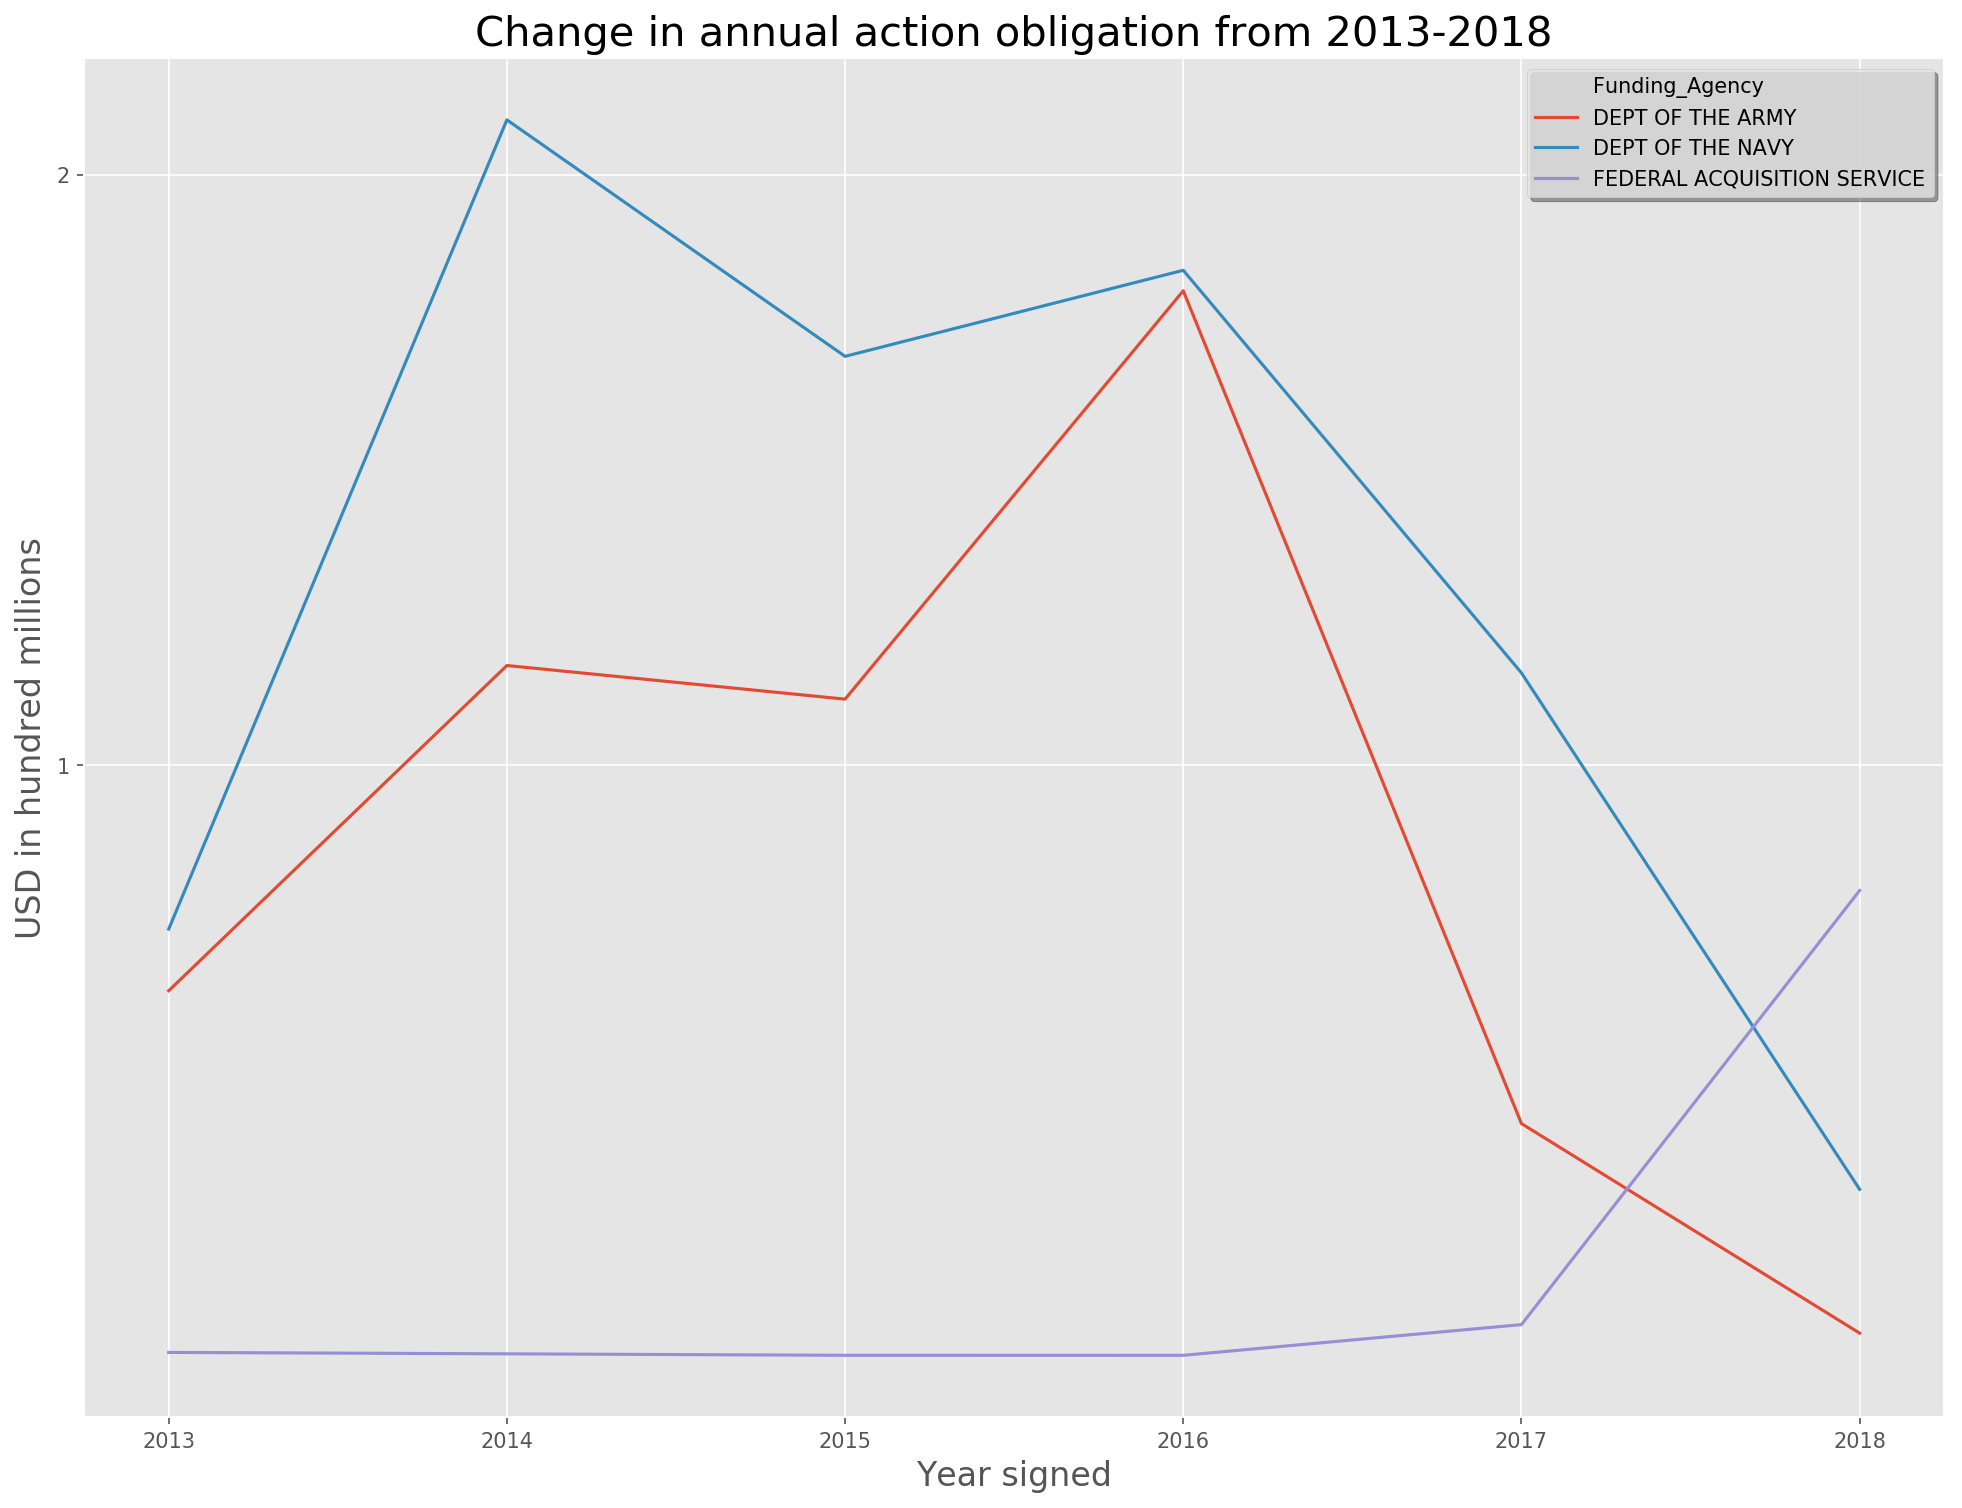

In [220]:
fig, ax = plt.subplots(1, 1, figsize=(16,12), dpi=150)
ax = sns.lineplot(data=high_changes.groupby(['Funding_Agency', 'Year_Signed'])['Action_Obligation'].sum()[:18].reset_index(), 
            x='Year_Signed', y='Action_Obligation', hue='Funding_Agency')
legend = ax.legend(shadow=True, fancybox=True, framealpha=0.8)
plt.title('Change in annual action obligation from 2013-2018', size=20)
plt.xlabel('Year signed', size=16)
plt.ylabel('USD in hundred millions', size=16)
plt.yticks(np.arange(10**8, 2.5*10**8, 10**8), [1, 2])
plt.show()

#### Notes: Annual action obligation
Here we can see that ultimately the Departments of the Army and Navy went through foreign spending cuts from 2016 onward - recall that these are the biggest total changes in annual spending abroad taken from our data. The White House and its administration have openly made it a point to spend American dollars at home - these two must be strongly linked. The Federal Acquisition Service has seen some significant budget increases, which is also quite interesting.
### Ideas for further research
It is very interesting to see how tax dollars translate into Federal foreign budgets, however there are three major things

#### 1. Cleaner data with a dictionary

We can't be sure what negative values for action obligation mean, or why agencies with nearly identical names have different IDs. A data dictionary with the file could alleviate these problems.
#### 2. More complete history

The US government has invested in foreign companies for a considerable time. It would be fascinating to look at a lengthier history and try to match political trends with financial investments.
#### 3. Comparison alongside stateside contracts

This is clearly where the real revelations lie. A side-by-side comparison gives us much more context and can put things into a more relevant picture frame.